### Imports

In [1]:
%pip install scikit-fuzzy

import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

     |████████████████████████████████| 993 kB 4.4 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=9ad3b1d585e2d8878ac408e8c5cd97f4f0d4e27aba1d04ab043d08c6e48c8e73
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


### Definindo as variáveis de entrada e saída

#### Tabela 1

In [2]:
# Entrada
ang = ctrl.Antecedent(np.arange(30, 340, 10), 'angulo')
vel_ang = ctrl.Antecedent(np.arange(-10, 10.1, 0.1), 'velocidade angular')

# Saída
f = ctrl.Consequent(np.arange(-6, 6.2, 0.2), 'força')

#### Tabela 2

In [3]:
# Entrada
cart_pos = ctrl.Antecedent(np.arange(-0.4, 0.5, 0.1), 'posição do carro')
cart_vel = ctrl.Antecedent(np.arange(-1, 1.1, 0.1), 'velocidade do carro')

# Saída
f = ctrl.Consequent(np.arange(-6, 6.2, 0.2), 'força')

#### Tabela 3

In [4]:
# Entrada
ang2 = ctrl.Antecedent(np.arange(-30, 30.5, 0.5), 'angulo pendulo')
vel_ang2 = ctrl.Antecedent(np.arange(-6, 6.1, 0.1), 'velocidade angular pendulo')

# Saída
f = ctrl.Consequent(np.arange(-6, 6.2, 0.2), 'força')

### Definindo o conjunto Fuzzy

#### Saídas

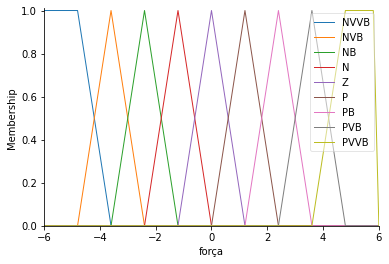

In [5]:
f['NVVB'] = fuzz.trapmf(f.universe, [-6, -6, -4.8, -3.6])
f['NVB'] = fuzz.trimf(f.universe, [-4.8, -3.6, -2.4])
f['NB'] = fuzz.trimf(f.universe, [-3.6, -2.4, -1.2])
f['N'] = fuzz.trimf(f.universe, [-2.4, -1.2, 0]) 
f['Z'] = fuzz.trimf(f.universe, [-1.2, 0, 1.2])
f['P'] = fuzz.trimf(f.universe, [0, 1.2, 2.4])
f['PB'] = fuzz.trimf(f.universe, [1.2, 2.4, 3.6])
f['PVB'] = fuzz.trimf(f.universe, [2.4, 3.6, 4.8])
f['PVVB'] = fuzz.trapmf(f.universe, [3.6, 4.8, 6, 6])
f.view()

#### Tabela 1

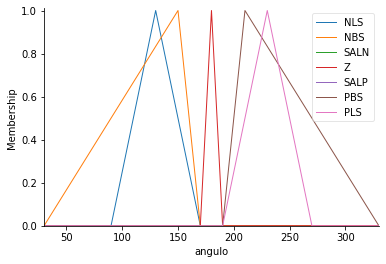

In [6]:
ang['NLS'] = fuzz.trimf(ang.universe, [90, 130, 170])
ang['NBS'] = fuzz.trimf(ang.universe, [30, 150, 170])
ang['SALN'] = fuzz.trimf(ang.universe, [170, 175, 180])
ang['Z'] = fuzz.trimf(ang.universe, [180, 180, 180])
ang['SALP'] = fuzz.trimf(ang.universe, [180, 185, 190])
ang['PBS'] = fuzz.trimf(ang.universe, [190, 210, 330])
ang['PLS'] = fuzz.trimf(ang.universe, [190, 230, 270])
ang.view()

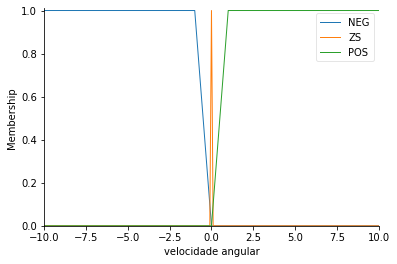

In [7]:
vel_ang['NEG'] = fuzz.trapmf(vel_ang.universe, [-10, -10, -1, 0])
vel_ang['ZS'] = fuzz.trapmf(vel_ang.universe, [-0.1, -0.001, 0.001, 0.1])
vel_ang['POS'] = fuzz.trapmf(vel_ang.universe, [0, 1, 10, 10])
vel_ang.view()

#### Tabela 2

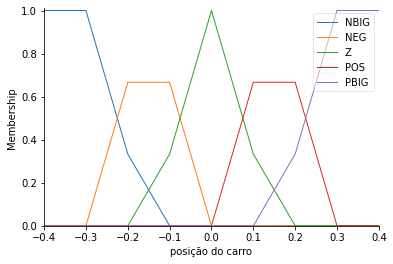

In [8]:
cart_pos['NBIG'] = fuzz.trapmf(cart_pos.universe, [-0.4, -0.4, -0.3, -0.15])
cart_pos['NEG'] = fuzz.trimf(cart_pos.universe, [-0.3, -0.15, 0])
cart_pos['Z'] = fuzz.trimf(cart_pos.universe, [-0.15, 0, 0.15])
cart_pos['POS'] = fuzz.trimf(cart_pos.universe, [0, 0.15, 0.3])
cart_pos['PBIG'] = fuzz.trapmf(cart_pos.universe, [0.15, 0.3, 0.4, 0.4])
cart_pos.view()

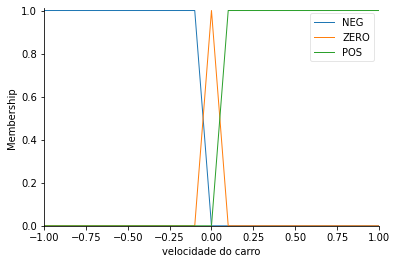

In [9]:
cart_vel['NEG'] = fuzz.trapmf(cart_vel.universe, [-1, -1, -0.1, 0])
cart_vel['ZERO'] = fuzz.trimf(cart_vel.universe, [-0.1, 0, 0.1]) 
cart_vel['POS'] = fuzz.trapmf(cart_vel.universe, [0, 0.1, 1, 1])
cart_vel.view()

#### Tabela 3

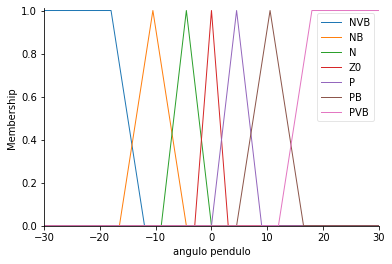

In [10]:
ang2['NVB'] = fuzz.trapmf(ang2.universe, [-30, -30, -18, -12])
ang2['NB'] = fuzz.trimf(ang2.universe, [-16.5, -10.5, -4.5])
ang2['N'] = fuzz.trimf(ang2.universe, [-9, -4.5, 0])
ang2['Z0'] = fuzz.trimf(ang2.universe, [-3, 0, 3])
ang2['P'] = fuzz.trimf(ang2.universe, [0, 4.5, 9])
ang2['PB'] = fuzz.trimf(ang2.universe, [4.5, 10.5, 16.5])
ang2['PVB'] = fuzz.trapmf(ang2.universe, [12, 18, 30, 30])
ang2.view()

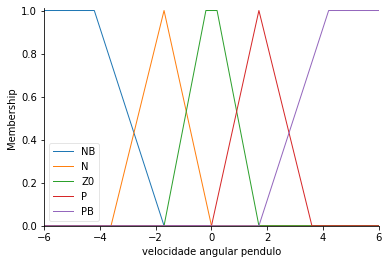

In [11]:
vel_ang2['NB'] = fuzz.trapmf(vel_ang2.universe, [-6, -6, -4.2, -1.7])
vel_ang2['N'] = fuzz.trimf(vel_ang2.universe, [-3.6, -1.7, 0])
vel_ang2['Z0'] = fuzz.trapmf(vel_ang2.universe, [-1.7, -0.2, 0.2, 1.7])
vel_ang2['P'] = fuzz.trimf(vel_ang2.universe, [0, 1.7, 3.6])
vel_ang2['PB'] = fuzz.trapmf(vel_ang2.universe, [1.7, 4.2, 6, 6])
vel_ang2.view()

### Definindo as regras

#### Tabela 1

In [12]:
controlador_1 = ctrl.ControlSystem([
  ctrl.Rule(ang['SALP'] & vel_ang['NEG'], f['P']),
  ctrl.Rule(ang['PBS'] & vel_ang['NEG'], f['Z']),
  ctrl.Rule(ang['PLS'] & vel_ang['NEG'], f['PB']),
  ctrl.Rule(ang['Z'] & vel_ang['ZS'], f['P']),
  ctrl.Rule(ang['NLS'] & vel_ang['POS'], f['NB']),
  ctrl.Rule(ang['NBS'] & vel_ang['POS'], f['Z']),
  ctrl.Rule(ang['SALN'] & vel_ang['POS'], f['N']),
])

#### Tabela 2

In [13]:
controlador_2 = ctrl.ControlSystem([
  ctrl.Rule(cart_pos['NBIG'] & cart_vel['NEG'], f['PVVB']),
  ctrl.Rule(cart_pos['NEG'] & cart_vel['NEG'], f['PVB']),
  ctrl.Rule(cart_pos['Z'] & cart_vel['NEG'], f['PB']),
  ctrl.Rule(cart_pos['Z'] & cart_vel['ZERO'], f['Z']),
  ctrl.Rule(cart_pos['Z'] & cart_vel['POS'], f['NB']),
  ctrl.Rule(cart_pos['POS'] & cart_vel['POS'], f['NVB']),
  ctrl.Rule(cart_pos['PBIG'] & cart_vel['POS'], f['NVVB']),
])

#### Tabela 3

In [14]:
controlador_3 = ctrl.ControlSystem([
  ctrl.Rule(ang2['NVB'] & vel_ang2['NB'], f['NVVB']),
  ctrl.Rule(ang2['NB'] & vel_ang2['NB'], f['NVVB']),
  ctrl.Rule(ang2['N'] & vel_ang2['NB'], f['NVB']),
  ctrl.Rule(ang2['Z0'] & vel_ang2['NB'], f['NB']),
  ctrl.Rule(ang2['P'] & vel_ang2['NB'], f['N']),
  ctrl.Rule(ang2['PB'] & vel_ang2['NB'], f['Z']),
  ctrl.Rule(ang2['PVB'] & vel_ang2['NB'], f['P']),
  ctrl.Rule(ang2['NVB'] & vel_ang2['N'], f['NVVB']),
  ctrl.Rule(ang2['NB'] & vel_ang2['N'], f['NVB']),
  ctrl.Rule(ang2['N'] & vel_ang2['N'], f['NB']),
  ctrl.Rule(ang2['Z0'] & vel_ang2['N'], f['N']),
  ctrl.Rule(ang2['P'] & vel_ang2['N'], f['Z']),
  ctrl.Rule(ang2['PB'] & vel_ang2['N'], f['P']),
  ctrl.Rule(ang2['PVB'] & vel_ang2['N'], f['PB']),
  ctrl.Rule(ang2['NVB'] & vel_ang2['Z0'], f['NVB']),
  ctrl.Rule(ang2['NB'] & vel_ang2['Z0'], f['NB']),
  ctrl.Rule(ang2['N'] & vel_ang2['Z0'], f['N']),
  ctrl.Rule(ang2['Z0'] & vel_ang2['Z0'], f['Z']),
  ctrl.Rule(ang2['P'] & vel_ang2['Z0'], f['P']),
  ctrl.Rule(ang2['PB'] & vel_ang2['Z0'], f['PB']),
  ctrl.Rule(ang2['PVB'] & vel_ang2['Z0'], f['PVB']),
  ctrl.Rule(ang2['NVB'] & vel_ang2['P'], f['NB']),
  ctrl.Rule(ang2['NB'] & vel_ang2['P'], f['N']),
  ctrl.Rule(ang2['N'] & vel_ang2['P'], f['Z']),
  ctrl.Rule(ang2['Z0'] & vel_ang2['P'], f['P']),
  ctrl.Rule(ang2['P'] & vel_ang2['P'], f['PB']),
  ctrl.Rule(ang2['PB'] & vel_ang2['P'], f['PVB']),
  ctrl.Rule(ang2['PVB'] & vel_ang2['P'], f['PVVB']),
  ctrl.Rule(ang2['NVB'] & vel_ang2['PB'], f['N']),
  ctrl.Rule(ang2['NB'] & vel_ang2['PB'], f['Z']),
  ctrl.Rule(ang2['N'] & vel_ang2['PB'], f['P']),
  ctrl.Rule(ang2['Z0'] & vel_ang2['PB'], f['PB']),
  ctrl.Rule(ang2['P'] & vel_ang2['PB'], f['PVB']),
  ctrl.Rule(ang2['PB'] & vel_ang2['PB'], f['PVVB']),
  ctrl.Rule(ang2['PVB'] & vel_ang2['PB'], f['PVVB'])
])

### Simulação

#### Tabela 1 (swing-up)

Força: 1.20

Gráficos de pertinência


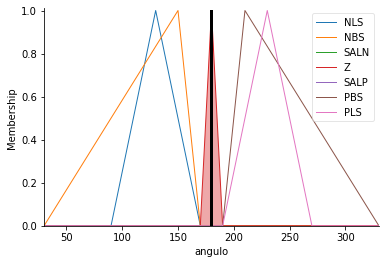

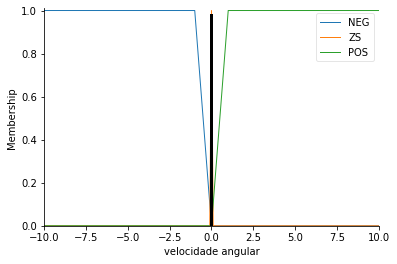

In [15]:
swing_up = ctrl.ControlSystemSimulation(controlador_1)

swing_up.input['angulo'] = 180
swing_up.input['velocidade angular'] = -0.002

swing_up.compute()

res = swing_up.output['força']
print(f'Força: {res:.2f}', end='\n\n')
print('Gráficos de pertinência')
ang.view(sim=swing_up)
vel_ang.view(sim=swing_up)

#### Tabela 2 (posição do carro)

Força: -1.46

Gráficos de pertinência


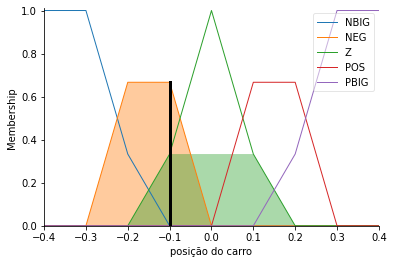

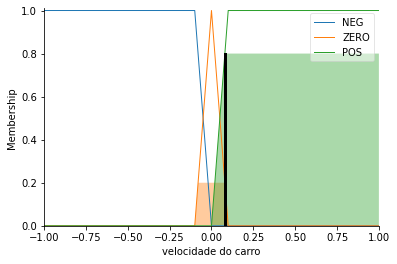

In [16]:
fuzzy_cart_position = ctrl.ControlSystemSimulation(controlador_2)

fuzzy_cart_position.input['posição do carro'] = -0.1
fuzzy_cart_position.input['velocidade do carro'] = 0.08

fuzzy_cart_position.compute()

res = fuzzy_cart_position.output['força']
print(f'Força: {res:.2f}', end='\n\n')
print('Gráficos de pertinência')
cart_pos.view(sim=fuzzy_cart_position)
cart_vel.view(sim=fuzzy_cart_position)

#### Tabela 3 (estabilização)

Força: 0.04

Gráficos de pertinência


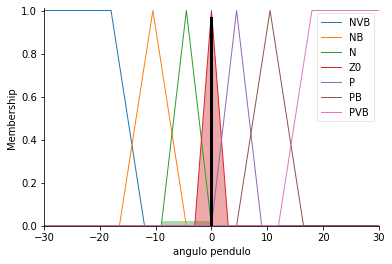

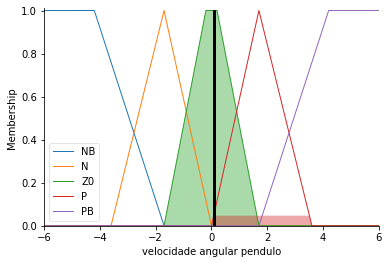

In [17]:
stabilization = ctrl.ControlSystemSimulation(controlador_3)

stabilization.input['angulo pendulo'] = -0.1
stabilization.input['velocidade angular pendulo'] = 0.08

stabilization.compute()

res = stabilization.output['força']
print(f'Força: {res:.2f}', end='\n\n')
print('Gráficos de pertinência')
ang2.view(sim=stabilization)
vel_ang2.view(sim=stabilization)